Comparison between Corrfunc and F-corrfunc results 
for the density auto-correlation function (DD in Corrfunc) in realspace PBC

In [387]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from hankel import HankelTransform
from datetime import datetime
from scipy.interpolate import InterpolatedUnivariateSpline as spline 
path = '/Users/ngoc/Desktop/Master-study/project'

In [388]:
#cosmological parameters
z        = 0.306
Omg_lamb = 0.685
Omg_m    = 1 - Omg_lamb
a        = 1/(1 + z)
E_a      = np.sqrt(Omg_m*(1+z)**3 + Omg_lamb)

In [389]:
#simulation parameter
boxsize  = 2000          #[Mpc/h]
nthreads = 4            #The number of OpenMP threads to use
autocorr = 1 
nbins    = 100             #number of bins
r_min    = 1               #[Mpc/h]
r_max    = boxsize/3       #[Mpc/h]
bins     = np.logspace(np.log10(r_min), np.log10(r_max), nbins + 1)
#bins     = np.linspace(r_min, r_max, nbins + 1)

In [390]:
# Calculation using Corrfunc for nonPBC

#load positions of halos

X = np.loadtxt(path+'/catalogs/18/gals/2gpc/R118_S014_clu_d.cat', usecols = (1))
Y = np.loadtxt(path+'/catalogs/18/gals/2gpc/R118_S014_clu_d.cat', usecols = (2))
Z = np.loadtxt(path+'/catalogs/18/gals/2gpc/R118_S014_clu_d.cat', usecols = (3))
    
weights = np.full_like(X,1)

In [391]:
print(len(X))

163172


In [392]:
#calculate data-data pairs
results_DD = DD(autocorr,
                nthreads,
                bins,
                X, Y, Z,
                weights1    = weights,
                boxsize     = boxsize,
                weight_type = 'pair_product',
                output_ravg = True,
                periodic    = True) 

#calculate random-random pairs in PBC case
N_halo = len(X)

#random-random pairs in the case of PBC
RR   = (4./3.*np.pi*(bins[1::]**3 - bins[0:-1:]**3))*N_halo*(N_halo-1)/boxsize**3
 

In [393]:
DD  = results_DD['npairs']
xi  = DD*results_DD['weightavg']/RR - 1
r   = results_DD['ravg']

In [394]:
# Linear theory
b   = 3.11
k   = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (0))
P   = np.loadtxt(path+'/results/power_spectrum.txt', usecols = (1))
P_k = spline(k, P)
h0  = HankelTransform(nu=1/2, N = 3000, h = 1e-3)

# xi density in real space
f_0 = lambda k: P_k(k)*k**(1/2)/(np.pi*2)**(3/2)

xi_theory = 1/np.sqrt(r)*h0.transform(f_0,r, ret_err=False, inverse=True)*b**2

In [395]:
# load result of F-corrfunc for PBC case (dx > rmax then dx = L - dx)

DD_f = np.loadtxt(path+'/my-f-code/results/xi-PBC-test5.txt', usecols = (0))
r_f  = np.loadtxt(path+'/my-f-code/results/xi-PBC-test5.txt', usecols = (1))

In [396]:
xi_f = DD_f/RR-1

Text(0.5, 1.0, '$\\xi_{dd}$ in real space')

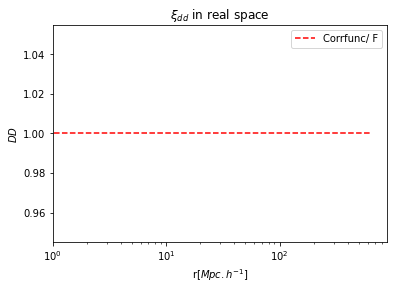

In [397]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(r,   DD/DD_f,  'r--',  label='Corrfunc/ F')
#ax.plot(r,   DD/DD_f2,  'b.',  label='Corrfunc/ F2')
#ax.plot(r,   DD,  'b--',  label='Corrfunc')
#ax.plot(r,   DD_f,  'r--',  label='F')
ax.set_ylabel("$DD$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.legend()
#ax.set_ylim(-10,)
ax.set_xlim(1,)
ax.set_title('$\\xi_{dd}$ in real space')


In [398]:
print(np.c_[DD/DD_f, DD/RR-1, DD_f/RR-1])

[[ 1.00000000e+00  2.33026031e+00  2.33026031e+00]
 [ 1.00000000e+00  5.02814375e+00  5.02814375e+00]
 [ 1.00000000e+00  6.21429065e+00  6.21429065e+00]
 [ 1.00000000e+00  8.27462586e+00  8.27462586e+00]
 [ 1.00000000e+00  1.42619186e+01  1.42619186e+01]
 [ 1.00000000e+00  1.98449068e+01  1.98449068e+01]
 [ 1.00000000e+00  2.64825005e+01  2.64825005e+01]
 [ 1.00000000e+00  2.63724214e+01  2.63724214e+01]
 [ 1.00000000e+00  2.68370466e+01  2.68370466e+01]
 [ 1.00000000e+00  2.91546373e+01  2.91546373e+01]
 [ 1.00000000e+00  2.57992099e+01  2.57992099e+01]
 [ 1.00000000e+00  2.54909303e+01  2.54909303e+01]
 [ 1.00000000e+00  2.70144737e+01  2.70144737e+01]
 [ 1.00000000e+00  2.21551868e+01  2.21551868e+01]
 [ 1.00000000e+00  2.12630095e+01  2.12630095e+01]
 [ 1.00000000e+00  1.87814903e+01  1.87814903e+01]
 [ 1.00000000e+00  1.88305954e+01  1.88305954e+01]
 [ 1.00000000e+00  1.57271062e+01  1.57271062e+01]
 [ 1.00000000e+00  1.43139838e+01  1.43139838e+01]
 [ 1.00000000e+00  1.32691032e+

Text(0.5, 1.0, '$\\xi_{dd}$ in real space')

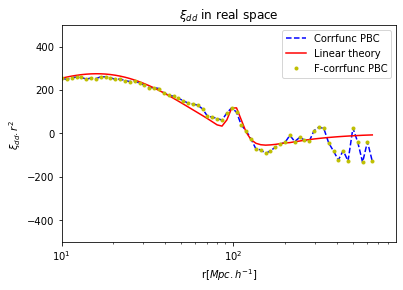

In [399]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
#ax.plot(r,   DD/DD_f,  'r--',  label='Corrfunc/ F')
ax.plot(r,   (DD/RR-1)*r**2,  'b--',  label='Corrfunc PBC')
ax.plot(r,   xi_theory*r**2,'r-', label='Linear theory')
ax.plot(r, (DD_f/RR-1)*r**2,'y.',  label='F-corrfunc PBC')
#ax.plot(r, (DD_f2/RR-1)*r**2,'g--',  label='F-corrfunc 2 PBC')
ax.set_ylabel("$\\xi_{dd}.r^2$ ")
ax.set_xlabel("r$[Mpc.h^{-1}]$")
ax.legend()
ax.set_ylim(-500,500)
ax.set_xlim(10,)
ax.set_title('$\\xi_{dd}$ in real space')
#plt.savefig('why.png')

In [400]:
print(np.c_[r, xi/xi_f])

[[  1.0312699    1.        ]
 [  1.10633456   1.        ]
 [  1.17523741   1.        ]
 [  1.24813135   1.        ]
 [  1.35322528   1.        ]
 [  1.43355761   1.        ]
 [  1.52772159   1.        ]
 [  1.62747838   1.        ]
 [  1.73735884   1.        ]
 [  1.853429     1.        ]
 [  1.98079452   1.        ]
 [  2.11739927   1.        ]
 [  2.25498139   1.        ]
 [  2.40828861   1.        ]
 [  2.57258146   1.        ]
 [  2.74230926   1.        ]
 [  2.92447559   1.        ]
 [  3.12238206   1.        ]
 [  3.33182282   1.        ]
 [  3.55967583   1.        ]
 [  3.79660596   1.        ]
 [  4.04963167   1.        ]
 [  4.31840993   1.        ]
 [  4.61113995   1.        ]
 [  4.92500568   1.        ]
 [  5.25492308   1.        ]
 [  5.60643259   1.        ]
 [  5.97932748   1.        ]
 [  6.38570418   1.        ]
 [  6.81513296   1.        ]
 [  7.26991678   1.        ]
 [  7.76091766   1.        ]
 [  8.27862938   1.        ]
 [  8.83310903   1.        ]
 [  9.43501936

Why F-corrfunc goes wrong on large scales (> BAO?) 

xi vv auto correlation in real space

In [ ]:
r_vv2        = np.loadtxt(path+'/my-p-code/xi_vv_realspace_quad.txt', usecols = 0)
xi_vv2       = np.loadtxt(path+'/my-p-code/xi_vv_realspace_quad.txt', usecols = 1)